In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
uncleaned_df = pd.read_csv('Data/Happiness_Index.csv', encoding='ISO-8859-1')
uncleaned_df

,startDate,endDate,duration,recordedDate,locationLatitude,locationLongitude,QID11,QID12_TEXT,QID17,QID18_1,...,QID31_G0_6_RANK,QID31_G0_7_RANK,QID31_G0_8_RANK,QID31_G0_9_RANK,QID31_9_TEXT,QID30_TEXT,QID8,QID32_TEXT,QID10,QID13
0,Start Date,End Date,Duration (in seconds),Recorded Date,LocationLatitude - Location Latitude,LocationLongitude - Location Longitude,"Q11 - If happiness can be rated from 1 to 10, ...","Q12 - Please give us ONE word, about ONE thing...",Q17 - Your gender?,Q18_1 - Year,...,Q31_6_RANK - Twitter,Q31_7_RANK - LinkedIn,Q31_8_RANK - Weibo,Q31_9_RANK - Others (please specify),Q31_9_TEXT - Others (please specify),Q30 - How many friends/contacts do you have on...,Q8 - On average how often do you post an updat...,Q32 - How many hours do you go exercise per mo...,Q10 - How often do you go out with friends?,Q13 - Please rate 1-10 how happy are you with ...
1,12/11/2016 20:19,12/11/2016 20:21,111,12/11/2016 20:21,41.72720337,-86.24479675,8,love,Female,1995,...,NaN,3,2,NaN,NaN,450,1-2 times a month.,20,More than 2 times a week.,9
2,12/11/2016 20:20,12/11/2016 20:23,162,12/11/2016 20:23,34.02659607,-118.2830963,5,Tequila,Female,1995,...,NaN,3,1,NaN,NaN,100,2-3 times a year.,30,More than 2 times a week.,7
3,12/11/2016 20:19,12/11/2016 20:24,299,12/11/2016 20:24,31.04559326,121.3996887,3,food,I prefer not to tell.,NaN,...,NaN,3,2,NaN,NaN,5,1-2 times a month.,15,1-2 times a month.,3
4,12/11/2016 20:20,12/11/2016 20:31,667,12/11/2016 20:31,34.05839539,-118.2779999,5,Money,Female,1994,...,NaN,NaN,3,NaN,NaN,500,Once a week.,2,Once a week.,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,12/11/2016 21:20,14/11/2016 9:16,129375,14/11/2016 9:16,9.966705322,76.23330688,9,Sea beach,Female,1968,...,3,NaN,NaN,NaN,NaN,55,2-3 times a year.,45,Less than once a month,6
250,14/11/2016 9:34,14/11/2016 9:37,145,14/11/2016 9:37,34.07640076,-118.2626038,7,Weightlifting,Male,1988,...,NaN,3,NaN,NaN,NaN,350,2-3 times a year.,25,1-2 times a month.,5
251,14/11/2016 16:08,14/11/2016 16:10,91,14/11/2016 16:10,33.78660583,-118.2986984,10,NaN,Male,1993,...,NaN,NaN,2,NaN,NaN,818,1-2 times a month.,20,Once a week.,8
252,15/11/2016 5:39,15/11/2016 5:42,166,15/11/2016 5:42,27.61669922,75.1499939,7,NaN,Female,1996,...,NaN,NaN,NaN,NaN,NaN,100+,1-2 times a month.,20,More than 2 times a week.,7


In [3]:
df = pd.read_excel('Data/Happiness_Index_cleaned.xlsx')
df

,index,start_time,end_time,duration,recorded_date,lat,lon,happiness_index,keyword,gender,...,rank_twitter,rank_linkedin,rank_weibo,rank_other,other,num_of_friends_social_media,social_media_update_frequency,hours_exercise_monthly,frequency_go_out_with_friends,life_balance_index
0,1,2016-12-11 20:19:00,2016-12-11 20:21:00,111,2016-12-11 20:21:00,41.727203,-86.244797,8.0,love,Female,...,NaN,3.0,2.0,NaN,NaN,450.0,3.0,20.0,4.0,9.0
1,2,2016-12-11 20:20:00,2016-12-11 20:23:00,162,2016-12-11 20:23:00,34.026596,-118.283096,5.0,Tequila,Female,...,NaN,3.0,1.0,NaN,NaN,100.0,2.0,30.0,4.0,7.0
2,3,2016-12-11 20:19:00,2016-12-11 20:24:00,299,2016-12-11 20:24:00,31.045593,121.399689,3.0,food,I prefer not to tell,...,NaN,3.0,2.0,NaN,NaN,5.0,3.0,15.0,2.0,3.0
3,4,2016-12-11 20:20:00,2016-12-11 20:31:00,667,2016-12-11 20:31:00,34.058395,-118.278000,5.0,Money,Female,...,NaN,NaN,3.0,NaN,NaN,500.0,4.0,2.0,3.0,4.0
4,5,2016-12-11 20:29:00,2016-12-11 20:32:00,157,2016-12-11 20:32:00,34.026596,-118.283096,5.0,People,Female,...,NaN,NaN,3.0,NaN,NaN,300.0,5.0,5.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,249,2016-12-11 21:20:00,14/11/2016 9:16,129375,14/11/2016 9:16,9.966705,76.233307,9.0,Sea beach,Female,...,3.0,NaN,NaN,NaN,NaN,55.0,2.0,45.0,1.0,6.0
249,250,14/11/2016 9:34,14/11/2016 9:37,145,14/11/2016 9:37,34.076401,-118.262604,7.0,Weightlifting,Male,...,NaN,3.0,NaN,NaN,NaN,350.0,2.0,25.0,2.0,5.0
250,251,14/11/2016 16:08,14/11/2016 16:10,91,14/11/2016 16:10,33.786606,-118.298698,10.0,NaN,Male,...,NaN,NaN,2.0,NaN,NaN,818.0,3.0,20.0,3.0,8.0
251,252,15/11/2016 5:39,15/11/2016 5:42,166,15/11/2016 5:42,27.616699,75.149994,7.0,NaN,Female,...,NaN,NaN,NaN,NaN,NaN,100.0,3.0,20.0,4.0,7.0


## Exploratory Data Analysis
- happiness index
- gender
- age
- hours_social_media_daily
- num_of_social_media
- num_of_friends_social_media

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          253 non-null    int64  
 1   start_time                     253 non-null    object 
 2   end_time                       253 non-null    object 
 3   duration                       253 non-null    int64  
 4   recorded_date                  253 non-null    object 
 5   lat                            253 non-null    float64
 6   lon                            253 non-null    float64
 7   happiness_index                252 non-null    float64
 8   keyword                        219 non-null    object 
 9   gender                         251 non-null    object 
 10  birth_year                     233 non-null    float64
 11  birth_month                    232 non-null    float64
 12  birth_day                      228 non-null    flo

In [5]:
df.describe()

,index,duration,lat,lon,happiness_index,birth_year,birth_month,birth_day,age,hours_social_media_daily,...,rank_snapchat,rank_twitter,rank_linkedin,rank_weibo,rank_other,num_of_friends_social_media,social_media_update_frequency,hours_exercise_monthly,frequency_go_out_with_friends,life_balance_index
count,253.000000,253.000000,253.000000,253.000000,252.000000,233.000000,232.000000,228.000000,233.000000,245.000000,...,24.000000,28.000000,74.000000,39.000000,21.000000,225.000000,247.000000,232.000000,250.000000,251.000000
mean,127.000000,1999.822134,29.192546,2.328711,6.912698,1991.506438,6.193966,15.416667,24.493562,2.889796,...,2.416667,2.321429,2.486486,2.128205,2.142857,1227.524444,3.437247,14.940733,2.680000,6.286853
std,73.179004,12684.036167,9.659867,96.146191,1.868249,7.181226,3.435410,8.718156,7.181226,3.080561,...,0.653863,0.862965,0.744721,0.731958,0.853564,13319.897769,1.307852,19.055001,0.986658,2.060434
min,1.000000,68.000000,-6.174393,-122.813095,1.000000,1944.000000,1.000000,1.000000,13.000000,0.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,64.000000,163.000000,22.569702,-118.244003,6.000000,1991.000000,3.000000,8.000000,22.000000,1.000000,...,2.000000,1.750000,2.000000,2.000000,1.000000,30.000000,3.000000,3.000000,2.000000,5.000000
50%,127.000000,220.000000,31.045593,75.483307,7.000000,1993.000000,6.000000,15.000000,23.000000,2.000000,...,2.500000,3.000000,3.000000,2.000000,2.000000,200.000000,3.000000,10.000000,3.000000,7.000000
75%,190.000000,306.000000,34.062195,77.583313,8.000000,1994.000000,9.000000,22.000000,25.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,500.000000,4.000000,20.000000,3.000000,8.000000
max,253.000000,129375.000000,49.194794,139.748291,10.000000,2003.000000,12.000000,31.000000,72.000000,24.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,200000.000000,6.000000,210.000000,4.000000,10.000000


Let's narrow down the dataset.

In [6]:
sub_df = df[['happiness_index', 'gender', 'age', 'hours_social_media_daily', 'num_of_social_media', 'num_of_friends_social_media']]
sub_df

,happiness_index,gender,age,hours_social_media_daily,num_of_social_media,num_of_friends_social_media
0,8.0,Female,21.0,8.0,5.0,450.0
1,5.0,Female,21.0,2.0,4.0,100.0
2,3.0,I prefer not to tell,NaN,1.0,3.0,5.0
3,5.0,Female,22.0,2.0,7.0,500.0
4,5.0,Female,24.0,4.0,4.0,300.0
...,...,...,...,...,...,...
248,9.0,Female,48.0,3.0,NaN,55.0
249,7.0,Male,28.0,1.5,3.0,350.0
250,10.0,Male,23.0,2.0,3.0,818.0
251,7.0,Female,20.0,1.0,4.0,100.0


In [7]:
sub_df.isnull().sum()

happiness_index                 1
gender                          2
age                            20
hours_social_media_daily        8
num_of_social_media             7
num_of_friends_social_media    28
dtype: int64

In [8]:
sub_df[sub_df.isnull().any(axis=1)]     # View all rows with NaN values

,happiness_index,gender,age,hours_social_media_daily,num_of_social_media,num_of_friends_social_media
2,3.0,I prefer not to tell,NaN,1.0,3.0,5.0
6,8.0,Female,24.0,NaN,NaN,NaN
11,7.0,Female,NaN,3.0,4.0,NaN
14,5.0,Male,22.0,NaN,4.0,500.0
19,9.0,Male,27.0,1.0,2.0,NaN
26,4.0,Female,22.0,5.5,4.0,NaN
33,3.0,Male,24.0,2.0,2.0,NaN
36,4.0,I prefer not to tell,NaN,NaN,NaN,NaN
38,8.0,Male,NaN,3.0,3.0,300.0
39,6.0,Male,NaN,3.0,2.0,30.0


### Stopped to think
Here we take a closer look at the mean, max and min of our data. Here are some things we noticed:

1. mean age is around 24.5 years old; our sample size is pretty young in general
2. max hours_social_media_daily is 24hrs (seems very unrealistic, so we assume that it is possible to spend time on multiple social media platforms at once)
3. mean of num_of_friends_social_media is ~13,000; here we should be careful not to over-generalise this data as it could vary greatly based on country, platform, or other factors

In [9]:
sub_df.describe()

,happiness_index,age,hours_social_media_daily,num_of_social_media,num_of_friends_social_media
count,252.000000,233.000000,245.000000,246.00000,225.000000
mean,6.912698,24.493562,2.889796,3.51626,1227.524444
std,1.868249,7.181226,3.080561,1.59263,13319.897769
min,1.000000,13.000000,0.500000,1.00000,0.000000
25%,6.000000,22.000000,1.000000,3.00000,30.000000
50%,7.000000,23.000000,2.000000,3.00000,200.000000
75%,8.000000,25.000000,3.000000,4.00000,500.000000
max,10.000000,72.000000,24.000000,12.00000,200000.000000


In [10]:
sub_df = sub_df.dropna()
sub_df.isnull().sum()

happiness_index                0
gender                         0
age                            0
hours_social_media_daily       0
num_of_social_media            0
num_of_friends_social_media    0
dtype: int64

In [11]:
f"We now have {sub_df.shape[0]} rows and {sub_df.shape[1]} columns."

'We now have 211 rows and 6 columns.'

In [12]:
sub_df.sample(10)

,happiness_index,gender,age,hours_social_media_daily,num_of_social_media,num_of_friends_social_media
116,8.0,Male,22.0,1.0,5.0,1000.0
80,7.0,Male,24.0,3.5,6.0,250.0
174,3.0,Male,28.0,2.0,3.0,770.0
100,8.0,Male,30.0,1.0,3.0,40.0
143,7.0,Female,22.0,5.0,2.0,58.0
183,7.0,Female,26.0,5.0,3.0,200.0
62,6.0,Male,23.0,3.0,4.0,300.0
29,8.0,Female,23.0,2.0,5.0,400.0
85,9.0,Female,20.0,1.0,3.0,70.0
198,5.0,Male,24.0,4.0,5.0,60.0


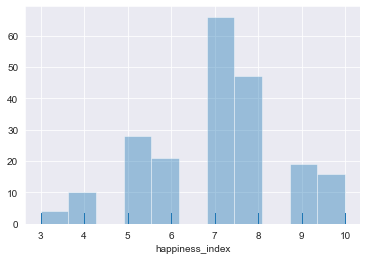

In [13]:
sns.set_style("darkgrid")

sns.distplot(sub_df['happiness_index'], kde=False, rug=True);

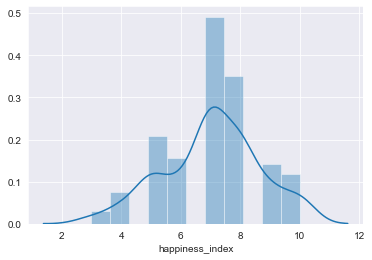

In [14]:
# kde is the kernel density estimation, which creates a smooth curve given a set of data 
sns.distplot(sub_df['happiness_index'])

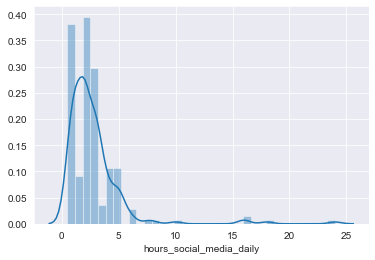

In [15]:
# Someone uses social media for 24 hours daily?! ö
sns.distplot(sub_df['hours_social_media_daily'])

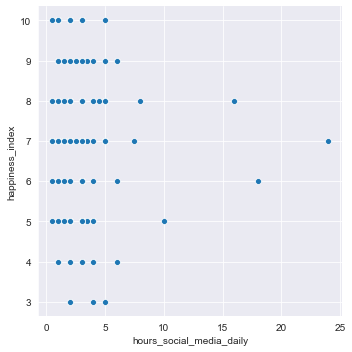

In [16]:
sns.relplot(x="hours_social_media_daily", y="happiness_index", data=sub_df);

Let's plot a line graph with the confidence interval.
The confidence interval (ci) is a range of values we are fairly sure our true value lies in (as represented by the shaded areas)


### Hours Social Media Daily

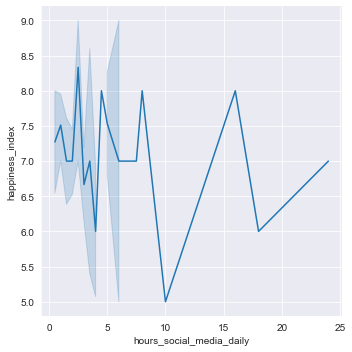

In [17]:
sns.relplot(x="hours_social_media_daily", y="happiness_index", kind='line', data=sub_df);

- there is no confidence interval for hours > 5 because we only have 1 data point for them
- for hours < 5, the confidence intervals are very wide as the happiness index observed could range from 3 to 10

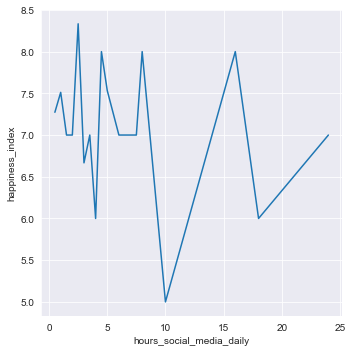

In [18]:
sns.relplot(x="hours_social_media_daily", y="happiness_index", kind='line', ci=None, data=sub_df);

In [19]:
x = sub_df['hours_social_media_daily']
y = sub_df['happiness_index']
x.corr(y)   

-0.04973083204499959

Looks like everyone spends about the same time on social media

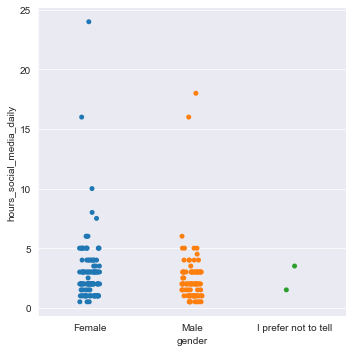

In [20]:
sns.catplot(x='gender', y='hours_social_media_daily', data=sub_df);

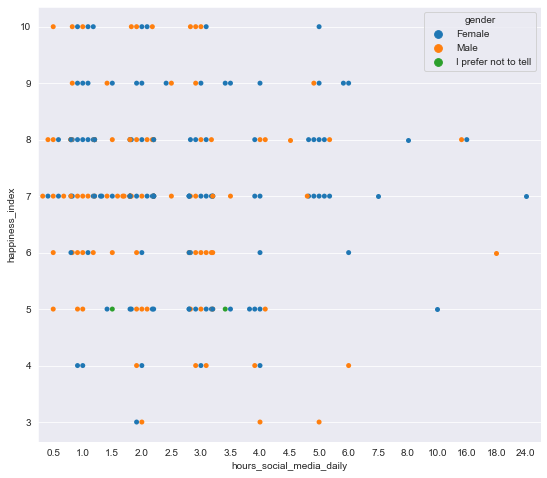

In [21]:
plt.figure(figsize=(9,8))
ax = sns.swarmplot(x="hours_social_media_daily", y="happiness_index", hue="gender", data=sub_df)

<Figure size 648x576 with 0 Axes>

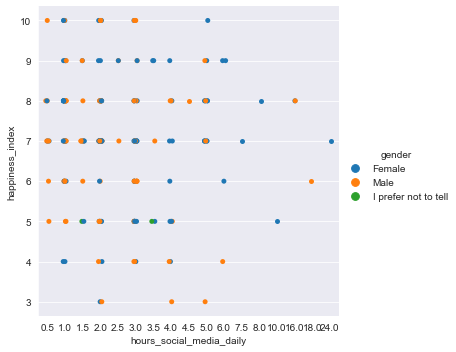

In [22]:
plt.figure(figsize=(9,8))
ax = sns.catplot(x="hours_social_media_daily", y="happiness_index", hue="gender", data=sub_df)

### Gender

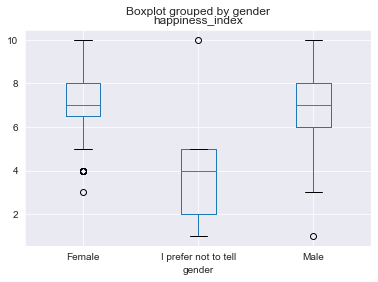

In [23]:
df.boxplot(by ='gender', column =['happiness_index'], grid = True) 

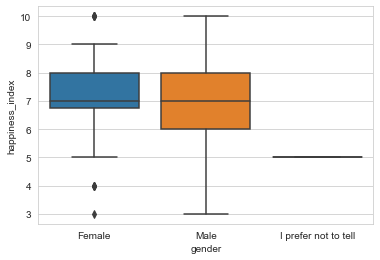

In [24]:
sns.set_style("whitegrid") 
sns.boxplot(x='gender', y='happiness_index', data=sub_df)

In [25]:
males_df = sub_df[sub_df['gender'] == 'Male']
females_df = sub_df[sub_df['gender'] == 'Female']

print(males_df.head(), '\n------------------------')
print(females_df.head())

    happiness_index gender   age  hours_social_media_daily  \
8               8.0   Male  25.0                       0.5   
22              7.0   Male  25.0                       0.5   
23              8.0   Male  22.0                       2.0   
25              8.0   Male  24.0                       4.0   
28              8.0   Male  24.0                       2.0   

    num_of_social_media  num_of_friends_social_media  
8                   4.0                        400.0  
22                  3.0                        100.0  
23                  5.0                        300.0  
25                  8.0                        500.0  
28                  1.0                          5.0   
------------------------
   happiness_index  gender   age  hours_social_media_daily  \
0              8.0  Female  21.0                       8.0   
1              5.0  Female  21.0                       2.0   
3              5.0  Female  22.0                       2.0   
4              5.0  Fem

<Figure size 432x288 with 0 Axes>

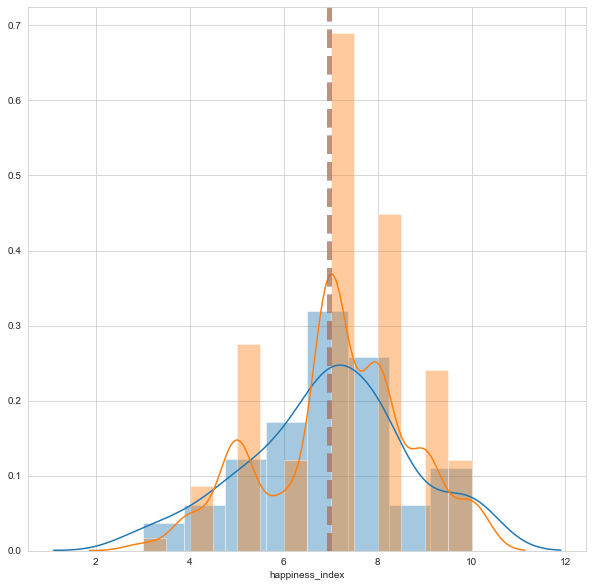

In [26]:
plt.figure()
plt.figure(figsize=(10, 10))
males_happiness = males_df['happiness_index']
females_happiness = females_df['happiness_index']
ax1 = sns.distplot(males_happiness)
ax2 = sns.distplot(females_happiness)
plt.axvline(np.mean(males_happiness), color='b', linestyle='dashed', linewidth=5, alpha=0.5)   # Add alpha for transparency
plt.axvline(np.mean(males_happiness), color='orange', linestyle='dashed', linewidth=5, alpha=0.5)

In [27]:
# If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, 
# then we reject the null hypothesis of equal averages.
stat, p = stats.ttest_ind(males_happiness, females_happiness)
print(f"The stat is {stat} and the p-value is {p}")

The stat is -0.7928832393864441 and the p-value is 0.4287536707446823


### Learning Checkpoint 1

Why is the p-value is so large?

The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups.

We expected the p-value to be small since there is barely any difference between the means of the males and females. What is the significance of the t-statistic (stat variable)?

We noticed that seaborn and pandas plot boxplots differently, so we should be careful when choosing which libraries to use. Read the documentation!

The medians for males and females remained the same at 7. However, the median was calculated to be 4 (pandas plot) and 5 (seaborn plot).

In pandas, the error bar (top whisker) was longer, going up to index 10, but in seaborn, the error bar was only up to index 9 and the point with index 10 was considered an outlier. This means that both platforms likely used slightly different mathematical formulas to calculate the median, interquartile ranges and whisker plots. Same for the males, one outlier point was removed in the seaborn plot.

While Pandas plot had interquartile (Q1-Q3) ranges for all categories, Seaborn plot also removed the interquartile range for 'I prefer not to tell' category.

In [28]:
sub_df

,happiness_index,gender,age,hours_social_media_daily,num_of_social_media,num_of_friends_social_media
0,8.0,Female,21.0,8.0,5.0,450.0
1,5.0,Female,21.0,2.0,4.0,100.0
3,5.0,Female,22.0,2.0,7.0,500.0
4,5.0,Female,24.0,4.0,4.0,300.0
5,6.0,Female,23.0,4.0,5.0,10.0
...,...,...,...,...,...,...
246,8.0,Female,25.0,1.0,5.0,350.0
247,6.0,Male,52.0,1.5,2.0,50.0
249,7.0,Male,28.0,1.5,3.0,350.0
250,10.0,Male,23.0,2.0,3.0,818.0


In [29]:
sub_df.head()

,happiness_index,gender,age,hours_social_media_daily,num_of_social_media,num_of_friends_social_media
0,8.0,Female,21.0,8.0,5.0,450.0
1,5.0,Female,21.0,2.0,4.0,100.0
3,5.0,Female,22.0,2.0,7.0,500.0
4,5.0,Female,24.0,4.0,4.0,300.0
5,6.0,Female,23.0,4.0,5.0,10.0


In [30]:
sub_df

,happiness_index,gender,age,hours_social_media_daily,num_of_social_media,num_of_friends_social_media
0,8.0,Female,21.0,8.0,5.0,450.0
1,5.0,Female,21.0,2.0,4.0,100.0
3,5.0,Female,22.0,2.0,7.0,500.0
4,5.0,Female,24.0,4.0,4.0,300.0
5,6.0,Female,23.0,4.0,5.0,10.0
...,...,...,...,...,...,...
246,8.0,Female,25.0,1.0,5.0,350.0
247,6.0,Male,52.0,1.5,2.0,50.0
249,7.0,Male,28.0,1.5,3.0,350.0
250,10.0,Male,23.0,2.0,3.0,818.0


### Number of Social Media/Friends on Social Media

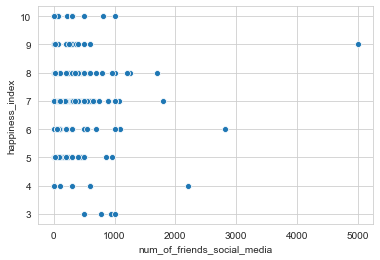

In [31]:
sns.scatterplot(data=sub_df, x="num_of_friends_social_media", y="happiness_index")

<Figure size 432x288 with 0 Axes>

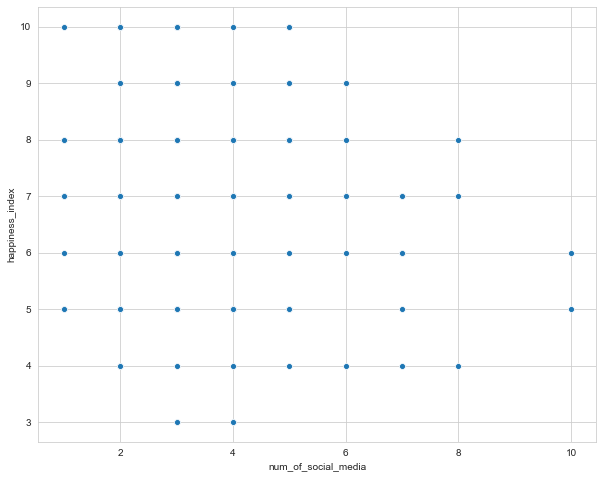

In [32]:
plt.figure()
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sub_df, x="num_of_social_media", y="happiness_index")

In [33]:
data = sub_df
x = sub_df['num_of_social_media']
y = sub_df['happiness_index']

(array([[ 0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  3.,  0.,
          0.,  2.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  4.,  0.,  0.,  4.,  0.,  0.,  2.,  0.,  0., 14.,  0.,
          0.,  7.,  0.,  0.,  3.,  0.,  4.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 2.,  0.,  1.,  0.,  0., 10.,  0.,  0.,  7.,  0.,  0., 28.,  0.,
          0., 19.,  0.,  0.,  6.,  0.,  8.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 2.,  0.,  1.,  0.,  0.,  6.,  0.,  0.,  6.,  0.,  0., 10.,  0.,
          0.,  9.,  0.,  0.,  5.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  4.,  0.,  0.,

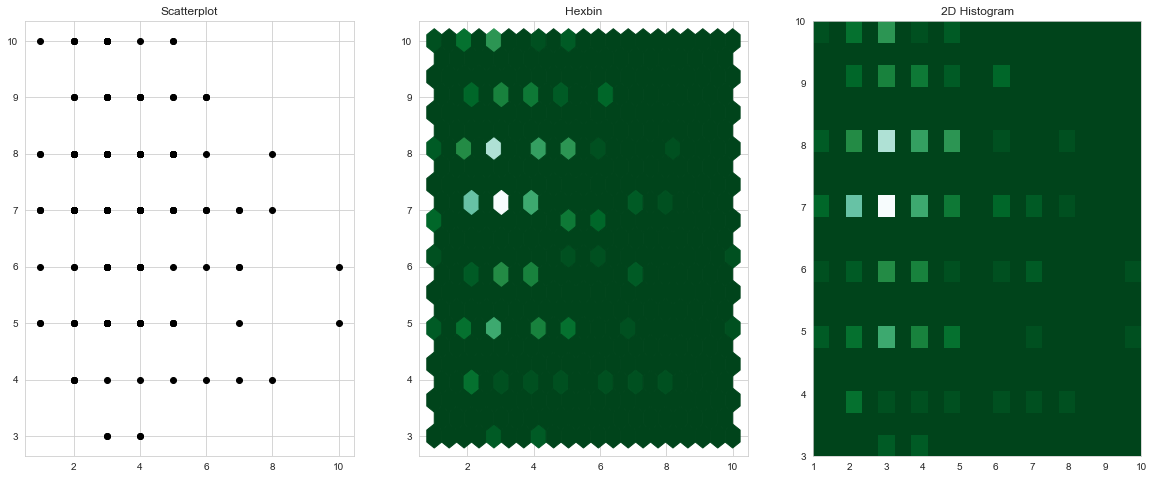

In [34]:
from scipy.stats import kde

# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 8))
 
# Everything starts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')

# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 

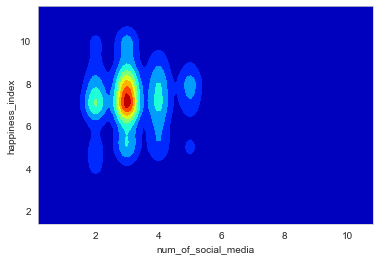

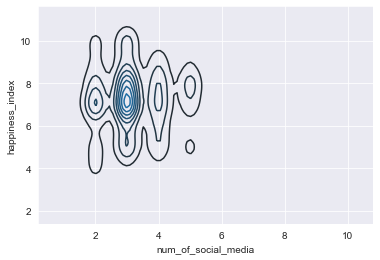

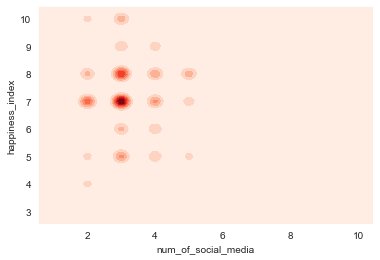

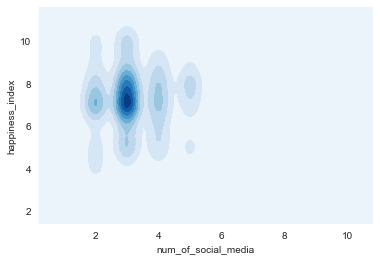

In [35]:
# https://python-graph-gallery.com/1136-2/
import seaborn as sns

sns.kdeplot(x, y, cmap="jet", shade=True)
plt.show()

# Basic 2D density plot - black contour lines only
sns.set_style("darkgrid")
# recall (see above): kde is the kernel density estimation, which creates a smooth curve given a set of data 
sns.kdeplot(x, y)
plt.show()
 
# Custom it with the same argument as 1D density plot - red graph, with dots (density plot)
sns.kdeplot(x, y, cmap="Reds", shade=True, bw=.15)
#bw is the smoothing parameter - i.e. whether we see distinct dots, or a smooth curve
#while cmap represents the colour map, aka adding colours. Reds = diff hues of red, try cmap="mako" for a beautiful color
plt.show()

# Some features are characteristic of 2D: color palette and wether or not color the lowest range - contours, but in blue
sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=True)
plt.show()
    



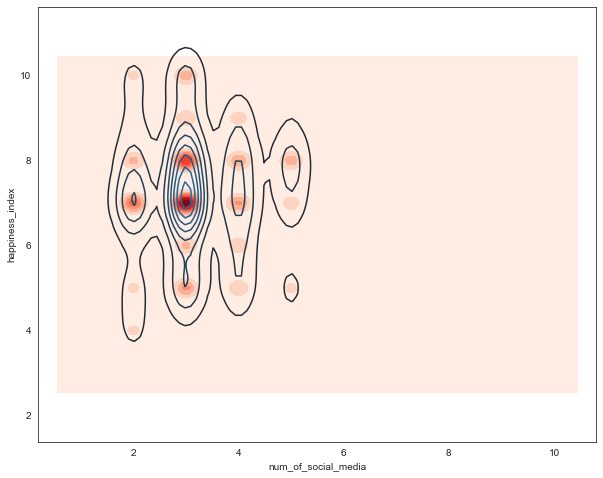

In [36]:
#This is a combination of the 1st and 2nd graph from above
plt.figure(figsize=(10, 8))

df = sns.load_dataset('iris')
 
# Basic 2D density plot (contour only)
sns.set_style("white")
sns.kdeplot(x, y)
 
# Custom it with the same argument as 1D density plot (red histogram)
sns.kdeplot(x, y, cmap="Reds", shade=True, bw=.15)
plt.show()

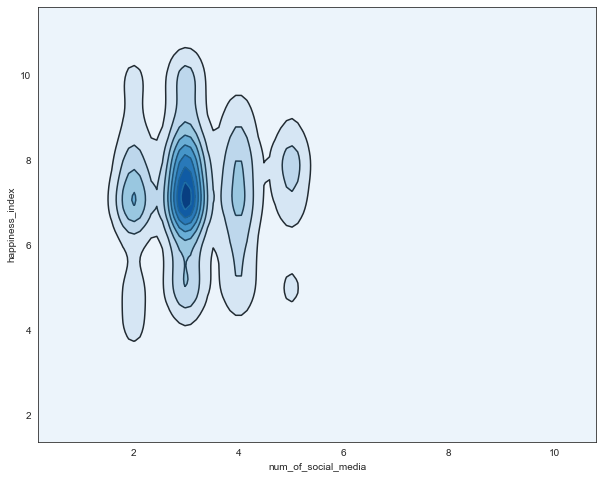

In [37]:
# https://python-graph-gallery.com/1136-2/
plt.figure(figsize=(10, 8))

# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(x, y)
# plt.show()

# Custom it with the same argument as 1D density plot
sns.kdeplot(x, y, cmap="Reds", shade=True, bw=.15)

# Some features are characteristic of 2D: color palette and wether or not color the lowest range
sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=True, )
plt.show()

### Learning points
1. What do the contours mean?
Contour lines show where the density of points are the same! It's almost like a 3D plot, because the colour hues give another 'dimension' to the graph.
2. What is KDE?
KDE represents Kernal Density Estimation!
3. cmap = colour map argument to colour the map
Red, Blue, Mako, 
4. Why do contours look different on two different computers, though running the same code, data and using the same jupyter notebook?


### TODO:
- https://seaborn.pydata.org/generated/seaborn.pairplot.html